In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [5]:
# Load 2017 data
df17 = pd.read_csv('../data/complete_data/trees_income_2017.csv')
df17.drop(columns=['Unnamed: 0'], inplace=True)
gdf17 = gpd.read_file('../data/complete_data/trees_income_2017.shp')

In [6]:
sorted(df17.columns)

['05_TD_Car',
 '05_TD_Truc',
 '05_TD_Vehi',
 '08-09W_FPM',
 '08-09W_NO2',
 '08-09W_SO2',
 '09-10W_FPM',
 '09-10W_NO2',
 '09-10W_SO2',
 '09S_FPM',
 '09S_NO2',
 '09S_O3',
 '10-11W_FPM',
 '10-11W_NO2',
 '10-11W_SO2',
 '10S_FPM',
 '10S_NO2',
 '10S_O3',
 '11-12W_FPM',
 '11-12W_NO2',
 '11-12W_SO2',
 '11S_FPM',
 '11S_NO2',
 '11S_O3',
 '12-13W_FPM',
 '12-13W_NO2',
 '12-13W_SO2',
 '12S_FPM',
 '12S_NO2',
 '12S_O3',
 '13-14W_FPM',
 '13-14W_NO2',
 '13-14W_SO2',
 '13S_FPM',
 '13S_NO2',
 '13S_O3',
 '14-15W_FPM',
 '14-15W_NO2',
 '14-15W_SO2',
 '14S_FPM',
 '14S_NO2',
 '14S_O3',
 '15-16W_FPM',
 '15-16W_NO2',
 '15-16W_SO2',
 '15S_FPM',
 '15S_NO2',
 '15S_O3',
 '16-17W_FPM',
 '16-17W_NO2',
 '16S_FPM',
 '16S_NO2',
 '16S_O3',
 '16_TD_Car',
 '16_TD_Truc',
 '16_TD_Vehi',
 '17S_FPM',
 '17S_NO2',
 '17S_O3',
 'BoroCD',
 'CD_name',
 'O3_09-17Ch',
 'O3_12-17Ch',
 'SO2_09-16C',
 'SO2_12-16C',
 'Summ_FPM_0',
 'Summ_FPM_1',
 'Summ_NO2_0',
 'Summ_NO2_1',
 'TD_Car_05-',
 'TD_Truck_0',
 'TD_Vehicle',
 'Wint_FPM_0',
 'Wi

In [7]:
# Rename columns
untruncate = {'TD_Car_05-':'TD_Car_05-16Chg',
                   'TD_Truck_0':'TD_Truck_05-16Chg', 
                   'TD_Vehicle':'TD_Vehicle_05-16Chg', 
                   'Summ_FPM_0':'Summ_FPM_09-17Chg', 
                   'Wint_FPM_0':'Wint_FPM_09-17Chg',
                   'Summ_NO2_0':'Summ_NO2_09-17Chg', 
                   'Wint_NO2_0':'Wint_NO2_09-17Chg', 
                                 'Summ_FPM_1':'Summ_FPM_12-17Chg', 
                   'Wint_FPM_1':'Wint_FPM_12-17Chg',
                   'Summ_NO2_1':'Summ_NO2_12-17Chg', 
                   'Wint_NO2_1':'Wint_NO2_12-17Chg', 
                   'SO2_09-16C':'SO2_09-16Chg',
                   'O3_09-17Ch':'O3_09-17Chg',
              'SO2_12-16C':'SO2_12-16Chg',
                   'O3_12-17Ch':'O3_12-17Chg',
                  'tree_cou_1': 'tree_count_05',
                  'tree_den_1': 'tree_density_05',
                'n_species_': 'n_species_05',
             'treecount_':'tree_count_chg', 
              'treedens_c': 'tree_dens_chg', 
              'nspecies_c': 'n_species_chg',
              '05_TD_Vehi': '05_TD_Vehicle',
              '16_TD_Vehi': '16_TD_Vehicle',
              '05_TD_Truc': '05_TD_Truck',
              '16_TD_Truc': '16_TD_Truck'
             }
df17.rename(columns=untruncate, inplace=True)

In [8]:
df17.dtypes

boro_ctlabel           object
borough                 int64
tract_area            float64
mean_tree_diameter    float64
alive                 float64
                       ...   
Wint_NO2_12-17Chg     float64
SO2_12-16Chg          float64
O3_12-17Chg           float64
geometry               object
hh_income               int64
Length: 98, dtype: object

In [9]:
df17.columns[df17.isnull().sum() >0]

Index(['alive_05', 'tree_count_05', 'tree_density_05', 'n_species_05',
       'tree_count_chg', 'tree_dens_chg', 'n_species_chg', 'alive_chg',
       '13S_FPM', '16-17W_FPM', '09-10W_FPM', '12-13W_FPM', '09S_FPM',
       '10S_FPM', '10-11W_FPM', '15S_FPM', '14-15W_FPM', '15-16W_FPM',
       '11-12W_FPM', '12S_FPM', '16S_FPM', '17S_FPM', '08-09W_FPM', '11S_FPM',
       '13-14W_FPM', '14S_FPM', '11S_NO2', '13-14W_NO2', '17S_NO2', '14S_NO2',
       '16S_NO2', '08-09W_NO2', '12-13W_NO2', '09S_NO2', '11-12W_NO2',
       '12S_NO2', '14-15W_NO2', '15-16W_NO2', '16-17W_NO2', '09-10W_NO2',
       '10-11W_NO2', '10S_NO2', '13S_NO2', '15S_NO2', '10-11W_SO2',
       '11-12W_SO2', '08-09W_SO2', '12-13W_SO2', '13-14W_SO2', '14-15W_SO2',
       '15-16W_SO2', '09-10W_SO2', '09S_O3', '13S_O3', '11S_O3', '14S_O3',
       '16S_O3', '10S_O3', '12S_O3', '15S_O3', '17S_O3', '05_TD_Vehicle',
       '16_TD_Vehicle', '16_TD_Car', '05_TD_Car', '16_TD_Truck', '05_TD_Truck',
       'TD_Car_05-16Chg', 'TD_Truck_05

In [10]:
# Create dummies for borough
df17['boro_num'] = df17['borough']
df17 = pd.get_dummies(df17, columns=['borough'], drop_first=True)

## Visualize correlations

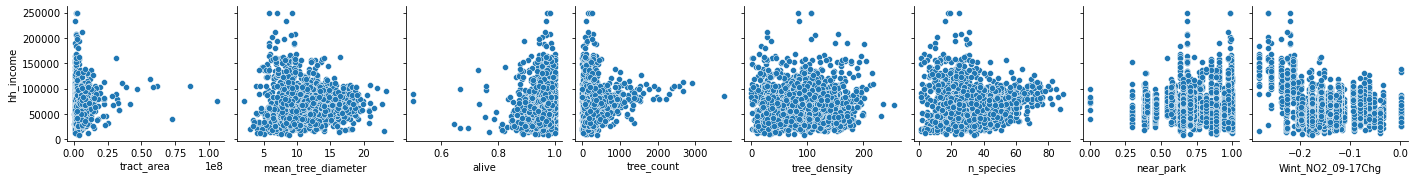

In [227]:
sns.pairplot(df17, x_vars=['tract_area', 'mean_tree_diameter', 'alive', 'tree_count', 'tree_density', 'n_species', 'near_park', 'Wint_NO2_09-17Chg'], y_vars = 'hh_income')

<AxesSubplot:>

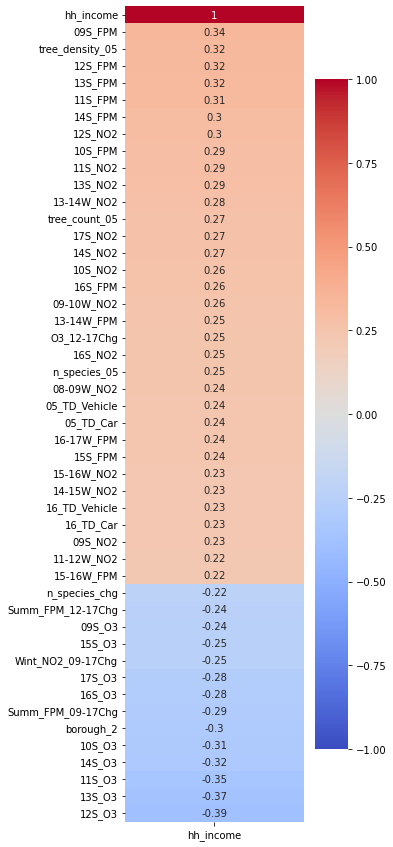

In [23]:
income_corr = df17.corr()[['hh_income']].sort_values('hh_income', ascending=False)
corr_1 = income_corr[(income_corr['hh_income'] >= .1) | (income_corr['hh_income'] <= -.1)] # Pulling features with absolute value correlation >=.1
corr_2 = income_corr[(income_corr['hh_income'] >= .22) | (income_corr['hh_income'] <= -.22)] # all those with absolute value correlation >=.22
plt.figure(figsize=(4, 15))
sns.heatmap(corr_2, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [24]:
corr_1.shape, corr_2.shape

((71, 1), (48, 1))

In [13]:
# Drop nans
df17.dropna(inplace=True)


# Add color column for plotting
df17['color'] = df17['boro_num'].map({1: 'gold', 2: 'blue', 3: 'green', 4: 'purple', 5: 'darkorange'})

## Two lists of features to try

In [25]:
# Features with abs. value linear correlation to household income greater than .1
feat2 = list(corr_2.index)[1:]

In [32]:
# Features based on EDA of air quality trends

feat4 = ['12-13W_NO2', 'Wint_NO2_09-17Chg', '17S_NO2', 'tree_count_05',
 'n_species_05', '10S_O3', '13S_O3', 'tree_density_05', '11-12W_NO2',
 '10S_FPM', 'tree_dens_chg', 'tree_count_chg', 'SO2_09-16Chg',
 'tract_area', 'mean_tree_diameter', 'n_species', '17S_FPM',
 'tree_density', 'tree_count', '10-11W_FPM', 'n_species_chg',
 '10-11W_SO2', '16-17W_FPM', 'health_poor', 'alive_chg', 'health_none',
 'health_good', 'alive_05', 'health_fair', 'alive', 'Summ_FPM_09-17Chg',
 'Wint_FPM_09-17Chg', 'Summ_NO2_09-17Chg', 'TD_Truck_05-16Chg',
 'TD_Car_05-16Chg', 'O3_09-17Chg', 'TD_Vehicle_05-16Chg', 'borough_2']
len(feat4)

38

# Random Forest 1

In [27]:
X = df17[feat2]
y = df17['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [28]:
params = {
    'n_estimators': [150, 175, 200, 225],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'ccp_alpha': [0, .1, .2]
}

gs = GridSearchCV(RandomForestRegressor(random_state=29), param_grid = params, cv=5, verbose=0)

gs.fit(X_train, y_train)
print(gs.best_params_)
gs.score(X_train, y_train), gs.score(X_test, y_test)

{'bootstrap': True, 'ccp_alpha': 0, 'max_features': 'sqrt', 'n_estimators': 225}


(0.9423971004680443, 0.6000224666076708)

**Model Summary**
- Features: = all with ||correlation|| >= 0.22
- best params: {'bootstrap': True, 'ccp_alpha': 0, 'max_features': 'sqrt', 'n_estimators': 225}
- R2 scores: (0.942, 0.600)

*High variance -- try with different features*

# Random Forest 2

In [33]:
# Re-run model with different features list

X = df17[feat4]
y = df17['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

params = {
    'n_estimators': [175, 200, 225],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'ccp_alpha': [0, .1, .2]
}

gs_2 = GridSearchCV(RandomForestRegressor(random_state=29), param_grid = params, cv=5, verbose=0)

gs_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=29),
             param_grid={'bootstrap': [True, False], 'ccp_alpha': [0, 0.1, 0.2],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [175, 200, 225]})

In [34]:
print(gs_2.best_params_)
gs_2.score(X_train, y_train), gs_2.score(X_test, y_test)

{'bootstrap': False, 'ccp_alpha': 0, 'max_features': 'sqrt', 'n_estimators': 175}


(1.0, 0.6338431399662103)

**Model Summary**
- Features: '12-13W_NO2', 'Wint_NO2_09-17Chg', '17S_NO2', 'tree_count_05',
       'n_species_05', '10S_O3', '13S_O3', 'tree_density_05', '11-12W_NO2',
       '10S_FPM', 'tree_dens_chg', 'tree_count_chg', 'SO2_09-16Chg',
       'tract_area', 'near_park', 'mean_tree_diameter', 'n_species', '17S_FPM',
       'tree_density', 'tree_count', '10-11W_FPM', 'n_species_chg',
       '10-11W_SO2', '16-17W_FPM', 'health_poor', 'alive_chg', 'health_none',
       'health_good', 'alive_05', 'health_fair', 'alive', 'Summ_FPM_09-17Chg',
       'Wint_FPM_09-17Chg', 'Summ_NO2_09-17Chg', 'TD_Truck_05-16Chg',
       'TD_Car_05-16Chg', 'O3_09-17Chg', 'TD_Vehicle_05-16Chg', 'borough_2'
- Best Parameters: 'bootstrap': False, 'ccp_alpha': 0, 'max_features': 'sqrt', 'n_estimators': 175
- Training R2 score: 1.0
- Testing R2 score: 0.633

In [156]:
feature_importances = pd.Series(gs_2.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)
print(len(feature_importances))
print(feature_importances.index)

39
Index(['12-13W_NO2', 'Wint_NO2_09-17Chg', '17S_NO2', 'tree_count_05',
       'n_species_05', '10S_O3', '13S_O3', 'tree_density_05', '11-12W_NO2',
       '10S_FPM', 'tree_dens_chg', 'tree_count_chg', 'SO2_09-16Chg',
       'tract_area', 'near_park', 'mean_tree_diameter', 'n_species', '17S_FPM',
       'tree_density', 'tree_count', '10-11W_FPM', 'n_species_chg',
       '10-11W_SO2', '16-17W_FPM', 'health_poor', 'alive_chg', 'health_none',
       'health_good', 'alive_05', 'health_fair', 'alive', 'Summ_FPM_09-17Chg',
       'Wint_FPM_09-17Chg', 'Summ_NO2_09-17Chg', 'TD_Truck_05-16Chg',
       'TD_Car_05-16Chg', 'O3_09-17Chg', 'TD_Vehicle_05-16Chg', 'borough_2'],
      dtype='object')


In [109]:
manhattan = df17[df17['boro_num'] == 1].copy()
bronx = df17[df17['boro_num'] == 2].copy()
brooklyn = df17[df17['boro_num'] == 3].copy()
queens = df17[df17['boro_num'] == 4].copy()
si = df17[df17['boro_num'] == 5].copy()

### Manhattan

In [112]:
X = manhattan[feat3]
y = manhattan['hh_income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

params = {
    'n_estimators': [150, 175, 200, 225],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'ccp_alpha': [0, .1, .2]
}

gs_m = GridSearchCV(RandomForestRegressor(random_state=29), param_grid = params, cv=5, verbose=0)

gs_m.fit(X_train, y_train)
print(gs_m.best_params_)
gs_m.score(X_train, y_train), gs_m.score(X_test, y_test)

{'bootstrap': True, 'ccp_alpha': 0.1, 'max_features': 'log2', 'n_estimators': 175}


ValueError: X has 91 features, but DecisionTreeRegressor is expecting 46 features as input.

In [114]:
print(gs_m.best_params_)
gs_m.score(X_train, y_train), gs_m.score(X_test, y_test)

{'bootstrap': True, 'ccp_alpha': 0.1, 'max_features': 'log2', 'n_estimators': 175}


(0.9429367659546404, 0.6380921357664977)

### Bronx

In [115]:
X = bronx[feat3]
y = bronx['hh_income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

params = {
    'n_estimators': [150, 175, 200, 225],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'ccp_alpha': [0, .1, .2]
}

gs_bx = GridSearchCV(RandomForestRegressor(random_state=29), param_grid = params, cv=5, verbose=0)

gs_bx.fit(X_train, y_train)
print(gs_m.best_params_)
gs_bx.score(X_train, y_train), gs_bx.score(X_test, y_test)

{'bootstrap': True, 'ccp_alpha': 0.2, 'max_features': 'log2', 'n_estimators': 225}


(0.9441740508461006, 0.5204049583717513)

### Brooklyn

In [116]:
X = brooklyn[feat3]
y = brooklyn['hh_income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

params = {
    'n_estimators': [150, 175, 200, 225],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'ccp_alpha': [0, .1, .2]
}

gs_bk = GridSearchCV(RandomForestRegressor(random_state=29), param_grid = params, cv=5, verbose=0)

gs_bk.fit(X_train, y_train)
print(gs_bk.best_params_)
gs_bk.score(X_train, y_train), gs_bk.score(X_test, y_test)

{'bootstrap': True, 'ccp_alpha': 0.2, 'max_features': 'sqrt', 'n_estimators': 225}


(0.928841826151715, 0.5009824468536035)

In [117]:
df17.columns

Index(['boro_ctlabel', 'tract_area', 'mean_tree_diameter', 'alive',
       'health_good', 'health_fair', 'health_poor', 'health_none', 'BoroCD',
       'tree_count', 'tree_density', 'n_species', 'alive_05', 'tree_count_05',
       'tree_density_05', 'n_species_05', 'tree_count_chg', 'tree_dens_chg',
       'n_species_chg', 'alive_chg', 'CD_name', '13S_FPM', '16-17W_FPM',
       '09-10W_FPM', '12-13W_FPM', '09S_FPM', '10S_FPM', '10-11W_FPM',
       '15S_FPM', '14-15W_FPM', '15-16W_FPM', '11-12W_FPM', '12S_FPM',
       '16S_FPM', '17S_FPM', '08-09W_FPM', '11S_FPM', '13-14W_FPM', '14S_FPM',
       '11S_NO2', '13-14W_NO2', '17S_NO2', '14S_NO2', '16S_NO2', '08-09W_NO2',
       '12-13W_NO2', '09S_NO2', '11-12W_NO2', '12S_NO2', '14-15W_NO2',
       '15-16W_NO2', '16-17W_NO2', '09-10W_NO2', '10-11W_NO2', '10S_NO2',
       '13S_NO2', '15S_NO2', '10-11W_SO2', '11-12W_SO2', '08-09W_SO2',
       '12-13W_SO2', '13-14W_SO2', '14-15W_SO2', '15-16W_SO2', '09-10W_SO2',
       '09S_O3', '13S_O3', '11S_O

## Principal Component Analysis

In [102]:
X = df17.drop(columns=['BoroCD', 'CD_name','Year', 'alive', 'boro_ctlabel', 'ct_11dig','geometry', 'hh_income'])
y = df17['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

pca = PCA(n_components=.999)
Z_train = pca.fit_transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

In [103]:
var_exp = pca.explained_variance_ratio_
np.cumsum(var_exp)

array([0.61005587, 0.68930842, 0.73711725, 0.77547302, 0.81104777,
       0.84352549, 0.86570711, 0.88603961, 0.90308118, 0.9177715 ,
       0.92890001, 0.93907626, 0.94797644, 0.95587081, 0.96325161,
       0.9693024 , 0.9747997 , 0.97985391, 0.98442259, 0.98797263,
       0.99071321, 0.9931153 , 0.99508319, 0.99641637, 0.99742729,
       0.99815327, 0.99858063, 0.99892602, 0.99921878])

- Through pca.explained_variance_ratio we see that the first 25 PCA features account for 99.7% of variance in the data

### Re-fit the Random Forest model using PCA features

In [104]:
params = {
    'n_estimators': [100, 125, 150, 175],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

gs_pca = GridSearchCV(RandomForestRegressor(random_state=29), param_grid = params, cv=5, verbose=0)

gs_pca.fit(Z_train, y_train)
print(gs_pca.best_params_)
gs_pca.score(Z_train, y_train), gs_pca.score(Z_test, y_test)

{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 150}


(0.9390110739612182, 0.6052712197777674)

**Using PCA does not help the accuracy of the model.**

In [ ]:
# Engineer some more features based on what I'm seeing



# Evaluate Random Forest Model

In [35]:
pred = gs_2.predict(X_test)
print(f'Null MSE: {y_test.var()}')
print(f'Model MSE: {metrics.mean_squared_error(y_test, pred)}')
print()
print(f'Null RMSE: {np.sqrt(y_test.var())}')
print(f'Model RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred))}')
print()
print(f'Based on MSE, model is a {round((y_test.var() - metrics.mean_squared_error(y_test, pred)) / y_test.var() * 100, 2)}% improvement from null')
print(f'Based on RMSE, model is a {round((np.sqrt(y_test.var()) - np.sqrt(metrics.mean_squared_error(y_test, pred))) / np.sqrt(y_test.var()) * 100, 2)}% improvement from null')
print()
print(f'Null R2 score: 0')
print(f'Model R2 score: {gs_2.score(X_test, y_test)}')

Null MSE: 1039285651.7652655
Model MSE: 379813957.9822139

Null RMSE: 32237.95359146212
Model RMSE: 19488.81622834527

Based on MSE, model is a 63.45% improvement from null
Based on RMSE, model is a 39.55% improvement from null

Null R2 score: 0
Model R2 score: 0.6338431399662103


In [36]:
pd.Series(gs_2.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)

12-13W_NO2             0.074527
Wint_NO2_09-17Chg      0.062505
10S_O3                 0.053607
13S_O3                 0.053180
17S_NO2                0.050325
tree_count_05          0.048621
n_species_05           0.044389
10S_FPM                0.035858
SO2_09-16Chg           0.032666
tree_dens_chg          0.030420
tree_density_05        0.030127
tree_count_chg         0.029480
11-12W_NO2             0.029164
tract_area             0.025796
10-11W_FPM             0.024815
mean_tree_diameter     0.024234
tree_count             0.023887
17S_FPM                0.022975
n_species              0.022456
tree_density           0.022303
10-11W_SO2             0.020400
n_species_chg          0.020382
16-17W_FPM             0.019972
alive_chg              0.016652
alive_05               0.016202
health_fair            0.016025
alive                  0.015901
health_poor            0.015673
health_none            0.015397
health_good            0.015360
Wint_FPM_09-17Chg      0.012926
O3_09-17

In [40]:
resid = y_test - pred

# Define a new df with X, y, and predictions
test_df = pd.DataFrame(X_test)
test_df['boro_num'] = df17.loc[X_test.index, 'boro_num']
test_df['borough'] = test_df['boro_num'].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
test_df['boro_ctlabel'] = df17.loc[X_test.index,'boro_ctlabel']
test_df['color'] = df17.loc[X_test.index, 'color']
test_df['hh_income'] = y_test
test_df['pred'] = pred
test_df['resid'] = resid
test_df.to_csv('../data/complete_data/test_df.csv')

In [38]:
test_df.head()

,12-13W_NO2,Wint_NO2_09-17Chg,17S_NO2,tree_count_05,n_species_05,10S_O3,13S_O3,tree_density_05,11-12W_NO2,10S_FPM,...,TD_Truck_05-16Chg,TD_Car_05-16Chg,O3_09-17Chg,TD_Vehicle_05-16Chg,borough_2,boro_num,borough,boro_ctlabel,hh_income,pred
1523,26.77,-0.152618,15.92,474.0,37.0,33.29,30.71,204.797283,26.18,13.32,...,0.320000,0.113821,0.118741,0.121212,0,4,Queens,4_183,70992,66612.651429
1004,26.43,-0.181503,14.69,196.0,15.0,33.00,30.37,107.252922,25.76,12.06,...,-0.200000,0.208955,0.182070,0.194245,0,3,Brooklyn,3_445,57604,50803.262857
872,28.67,-0.225217,17.33,85.0,11.0,30.46,27.62,27.396032,27.75,12.72,...,0.289474,-0.107143,0.214003,-0.077519,0,3,Brooklyn,3_31,85577,90068.525714
835,24.70,-0.111472,13.02,119.0,27.0,34.87,32.00,74.011204,22.10,11.50,...,-0.375000,-0.021978,0.115863,-0.036649,0,3,Brooklyn,3_276,53813,55561.948571
1860,25.04,-0.160816,13.77,383.0,39.0,33.67,31.08,191.343379,24.67,12.05,...,-0.181818,-0.136564,0.160536,-0.138075,0,4,Queens,4_677,92750,77490.697143


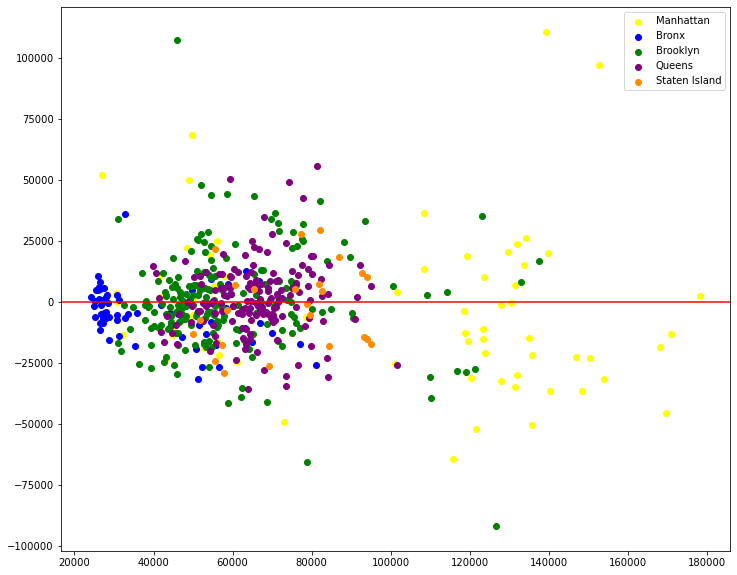

In [45]:
plt.figure(figsize=(12,10))
#Manhattan
plt.scatter(test_df[test_df['boro_num'] == 1]['pred'], test_df[test_df['boro_num'] == 1]['resid'], c='yellow', label='Manhattan')
#BX
plt.scatter(test_df[test_df['boro_num'] == 2]['pred'], test_df[test_df['boro_num'] == 2]['resid'], c='blue', label='Bronx')
#BK
plt.scatter(test_df[test_df['boro_num'] == 3]['pred'], test_df[test_df['boro_num'] == 3]['resid'], c='green', label='Brooklyn')
#Queens
plt.scatter(test_df[test_df['boro_num'] == 4]['pred'], test_df[test_df['boro_num'] == 4]['resid'], c='purple', label='Queens')
#SI
plt.scatter(test_df[test_df['boro_num'] == 5]['pred'], test_df[test_df['boro_num'] == 5]['resid'], c='darkorange', label='Staten Island')
plt.axhline(0, color='red')
plt.legend();

* The above residual plot shows that the model predicted best in the Bronx, worst in Manhattan, and worst where it was predicting high income.
* This is a manifestation of high variance and indicates the need to simplify the model or do more/different ensembling

In [50]:
# Are the wealthiest census tracts among those with high error?
high = test_df.sort_values('hh_income', ascending=False)[['boro_ctlabel', 'hh_income', 'pred', 'resid']].head()
low = test_df.sort_values('hh_income', ascending=True)[['boro_ctlabel', 'hh_income', 'pred', 'resid']].head()
high

,boro_ctlabel,hh_income,pred,resid
74,1_160.01,250001,139148.234286,110852.765714
205,1_317.03,250001,152548.628571,97452.371429
265,1_9,180547,178172.262857,2374.737143
10,1_109,160511,134067.040000,26443.960000
225,1_52,159821,139796.422857,20024.577143


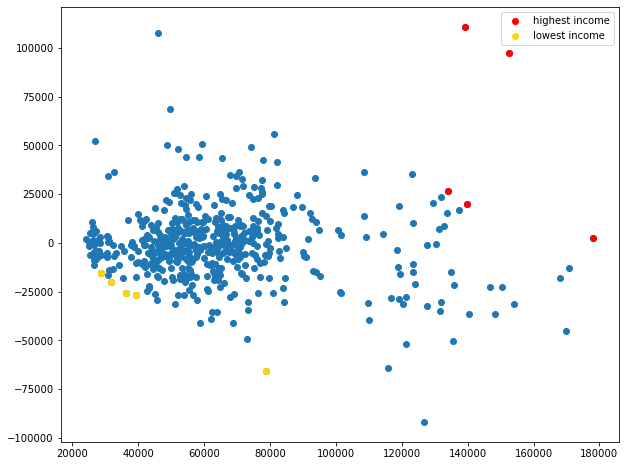

In [53]:
# Residual plot showing census tracts w/ highest and lowest income
plt.figure(figsize=(10,8))
plt.scatter(test_df['pred'], test_df['resid'])
plt.scatter(high['pred'], high['resid'], color='red', label='highest income')
plt.scatter(low['pred'], low['resid'], color='gold', label='lowest income')
plt.legend();

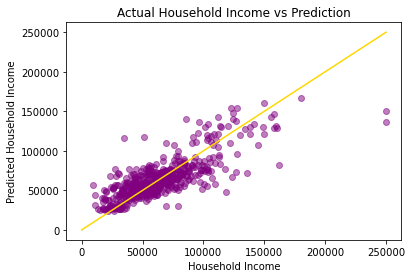

In [93]:
plt.scatter(x=y_test, y=pred, alpha=.5, color='purple')
plt.plot([10, 150000, 250000], [10, 150000, 250000], color='gold')
plt.title('Actual Household Income vs Prediction')
plt.xlabel('Household Income')
plt.ylabel('Predicted Household Income');

**EDA (see EDA notebook) showed a fifteen census tracts having extremely high income -- over 175k median**
Try dropping these rows from the data and running the model again

In [56]:
df17[df17['hh_income'] > 175000].shape

(15, 103)

### Random Forests 3&4

In [58]:
X = df17[df17['hh_income'] <= 175000][feat2]
y = df17[df17['hh_income'] <= 175000]['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

params = {
    'n_estimators': [175, 200, 225],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'ccp_alpha': [0, .1, .2]
}

gs_3 = GridSearchCV(RandomForestRegressor(random_state=29), param_grid = params, cv=5, verbose=0)

gs_3.fit(X_train, y_train)
print(gs_2.best_params_)
gs_3.score(X_train, y_train), gs_3.score(X_test, y_test)

{'bootstrap': True, 'ccp_alpha': 0.2, 'max_features': 'sqrt', 'n_estimators': 225}


(0.950772204572072, 0.5606569282532715)

- 95% training R2, 56% testing R2. This did not make the model perform any better, at least with these features.

In [59]:
X = df17[df17['hh_income'] <= 175000][feat2]
y = df17[df17['hh_income'] <= 175000]['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

params = {
    'n_estimators': [175, 200, 225],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'ccp_alpha': [0, .1, .2]
}

gs_4 = GridSearchCV(RandomForestRegressor(random_state=29), param_grid = params, cv=5, verbose=0)

gs_4.fit(X_train, y_train)
print(gs_2.best_params_)
gs_4.score(X_train, y_train), gs_4.score(X_test, y_test)

{'bootstrap': True, 'ccp_alpha': 0.2, 'max_features': 'sqrt', 'n_estimators': 225}


(0.9462969835683981, 0.48669500737347904)

- Even worse performance!

### Save

In [61]:
model_gdf = gpd.GeoDataFrame(X)
model_gdf['household_income'] = y
model_gdf['geometry'] = gdf17['geometry']
model_gdf['boro_num'] = df17['boro_num']
model_gdf['borough'] = model_gdf['boro_num'].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
#model_df.rename(columns={}, inplace=True)
model_gdf.to_file('../data/gdf_for_tableau.shp')

/var/folders/by/f27ws03s62v8tb7315j3kxm80000gn/T/ipykernel_2069/719384263.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  model_gdf.to_file('../data/gdf_for_tableau.shp')


Index(['17S_FPM', '10S_FPM', '11S_FPM', '10-11W_NO2', '14S_O3', '09S_FPM',
       '13-14W_NO2', '16S_O3', '12S_NO2', '14S_FPM', '08-09W_FPM', '12S_FPM',
       '09S_O3', '09-10W_NO2', '14S_NO2', '16S_NO2', '16S_FPM', '11-12W_FPM',
       '14-15W_NO2', '11S_O3', '10-11W_FPM', '15S_NO2', '09-10W_FPM',
       '17S_NO2', '16-17W_NO2', '10S_O3', '10S_NO2', '13S_O3', '13-14W_FPM',
       'alive_05', '17S_O3', 'health_none', '12-13W_NO2', 'alive',
       '12-13W_FPM', 'n_species_chg', 'Wint_NO2_09-17Chg', '09S_NO2', '12S_O3',
       'tract_area', 'tree_count', 'tree_dens_chg', 'tree_density_05',
       'tree_count_chg', 'n_species_05', 'tree_count_05', 'household_income',
       'geometry', 'boro_num', 'borough'],
      dtype='object')

# Unused Models

## Linear Regression

In [39]:
X = df17[feat]
y = df17['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.373960573509866, 0.4101866196287097)

In [41]:
pred = lr.predict(X_test)

In [42]:
metrics.mean_squared_error(y_test, pred)

615244554.8421506

In [43]:
# Baseline mse minus this model's
y.var() - metrics.mean_squared_error(y_test, pred)

399723128.764454

## Decision Tree

In [44]:
X = df17[feat]
y = df17['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [45]:
params = {
    'max_depth':[5,10],
    'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [1,2,3,4],
    'ccp_alpha': [.05, .1, .2]
}

gs = GridSearchCV(DecisionTreeRegressor(random_state=29), param_grid = params)
gs.fit(X_train, y_train)
print(gs.best_params_)
gs.score(X_train, y_train), gs.score(X_test, y_test)

{'ccp_alpha': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


(0.6267623937219322, 0.4837843090958186)

In [46]:
# View feature importances
pd.Series(gs.best_estimator_.feature_importances_, index=X.columns)

tract_area            0.026659
mean_tree_diameter    0.004937
alive                 0.000000
tree_count            0.074194
tree_density          0.043672
n_species             0.017869
borough_2             0.000000
health_good           0.000000
health_fair           0.000000
health_poor           0.006378
Summ_FPM_09-17Chg     0.050521
Wint_FPM_09-17Chg     0.004011
Summ_NO2_09-17Chg     0.000000
Wint_NO2_09-17Chg     0.506140
SO2_09-16Chg          0.021474
O3_09-17Chg           0.000000
17S_FPM               0.029140
17S_NO2               0.000000
17S_O3                0.000000
near_park             0.215003
dtype: float64

## Bagging


In [48]:
X = df17[feat]
y = df17['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [49]:
params = {
    'n_estimators': [10,15,20],
    'bootstrap_features':[True, False],
    'max_features': [.6, .8, 1.0],
    'max_samples': [.6, .8, 1.0]
}

gs = GridSearchCV(BaggingRegressor(random_state=29), param_grid=params, cv=5, verbose=0)

gs.fit(X_train, y_train)
print(gs.best_params_)
gs.score(X_train, y_train), gs.score(X_test, y_test)

{'bootstrap_features': False, 'max_features': 0.6, 'max_samples': 0.8, 'n_estimators': 20}


(0.90245763902151, 0.6008947106884466)

In [ ]:
# with feat = ['tract_area', 'mean_tree_diameter', 'alive', 'tree_count', 'tree_density', 'n_species', 'borough_2', 'health_good', 'health_fair', 'health_poor','Summ_FPM_09-17Chg', 'Wint_FPM_09-17Chg', 'Summ_NO2_09-17Chg', 'Wint_NO2_09-17Chg', 'SO2_09-16Chg', 'O3_09-17Chg','17S_FPM', '17S_NO2', '17S_O3']
#best params: {'bootstrap_features': True, 'max_features': 0.8, 'max_samples': 0.6, 'n_estimators': 20}
#scores: (0.8508088016975762, 0.6021431081711132)

# with feat = above plus near_park
# best params: {'bootstrap_features': False, 'max_features': 0.6, 'max_samples': 0.8, 'n_estimators': 20}
#scores: (0.90245763902151, 0.6008947106884466)

## ExtraTrees

In [60]:
X = df17[feat]
y = df17['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [63]:
params = {
    'n_estimators': [125, 150, 175, 200],
    'bootstrap': [True, False],
    'ccp_alpha': [0, .1, .2]
}

gs = GridSearchCV(ExtraTreesRegressor(random_state=29), param_grid = params, cv=5, verbose=0)

gs.fit(X_train, y_train)
print(gs.best_params_)
gs.score(X_train, y_train), gs.score(X_test, y_test)

{'bootstrap': True, 'ccp_alpha': 0.2, 'n_estimators': 200}


(0.9414764755504818, 0.6099736505084398)

In [64]:
# with features = 

# best_params: {'bootstrap': True, 'ccp_alpha': 0.2, 'n_estimators': 200}
# Scores: (0.9414764755504818, 0.6099736505084398)

## Gradient Boosting

In [216]:
X = df17[feat2]
y = df17['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [217]:
params = {
    'n_estimators': [100,150,200, 250],
    'learning_rate': [.01, .03, .05, .1, .15, .2],
}

gs = GridSearchCV(GradientBoostingRegressor(random_state=29), param_grid=params, cv=5, verbose=0)

gs.fit(X_train, y_train)
print(gs.best_params_)
gs.score(X_train, y_train), gs.score(X_test, y_test)

/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 412, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/anniebishai/opt/anaconda3/lib/pyth

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
# with feat = ['tract_area', 'mean_tree_diameter', 'alive', 'tree_count', 'tree_density', 'n_species', 'borough_2', 'health_good', 'health_fair', 'health_poor','Summ_FPM_09-17Chg', 'Wint_FPM_09-17Chg', 'Summ_NO2_09-17Chg', 'Wint_NO2_09-17Chg', 'SO2_09-16Chg', 'O3_09-17Chg','17S_FPM', '17S_NO2', '17S_O3']
#best params: {'learning_rate': 0.03, 'n_estimators': 250}
#scores: (0.7105250709915505, 0.5980537697891941)

# with feat = above plus near_park
# best params: {'learning_rate': 0.05, 'n_estimators': 150}
# scores: (0.7183352244791152, 0.5854793808595813)

## Adaboost

In [214]:
X = df17[feat]
y = df17['hh_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [215]:
params = {
    'n_estimators': [50, 75, 100,150],
    'learning_rate': [.01, .03, .05, .1, .15, .2],
}

gs = GridSearchCV(AdaBoostRegressor(random_state=29), param_grid=params, cv=5, verbose=0)

gs.fit(X_train, y_train)
print(gs.best_params_)
gs.score(X_train, y_train), gs.score(X_test, y_test)

/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 1008, in fit
    return super().fit(X, y, sample_weight)
  File "/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 104, in fit
    X, y = self._validate_data(X, y,
  File "/Users/anniebishai/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/anniebishai/opt/anaconda3/lib/python3

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# with feat =['tract_area', 'mean_tree_diameter', 'alive', 'tree_count', 'tree_density', 'n_species', 'borough_2', 'health_good', 'health_fair', 'health_poor','Summ_FPM_09-17Chg', 'Wint_FPM_09-17Chg', 'Summ_NO2_09-17Chg', 'Wint_NO2_09-17Chg', 'SO2_09-16Chg', 'O3_09-17Chg','17S_FPM', '17S_NO2', '17S_O3']

# best params:{'learning_rate': 0.1, 'n_estimators': 75}
# scores: (0.5215621918857868, 0.44430214880705854)

# with feat = above plus near park:
# best params:{'learning_rate': 0.01, 'n_estimators': 150}
# scores: (0.5469617969279339, 0.49567519481322675)